In [106]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

org_img=cv2.imread("images/bird.jpg",0)

f=np.fft.fft2(org_img)
fshift=np.fft.fftshift(f)
magnitude_spectrum=20*np.log(np.abs(fshift))

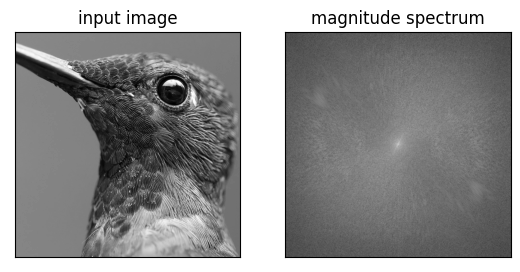

In [107]:
plt.subplot(121),plt.imshow(org_img,cmap='gray')
plt.title("input image"),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(magnitude_spectrum,cmap='gray')
plt.title("magnitude spectrum"),plt.xticks([]),plt.yticks([])

plt.show()

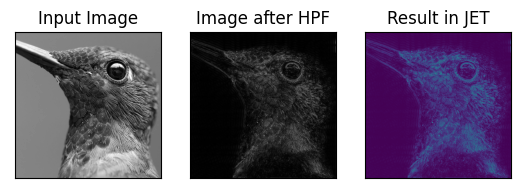

In [108]:

rows, cols = org_img.shape
crow,ccol = int(rows/2) , int(cols/2)
fshift[crow-30:crow+30, ccol-30:ccol+30] = 0


f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)


plt.subplot(131),plt.imshow(org_img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()



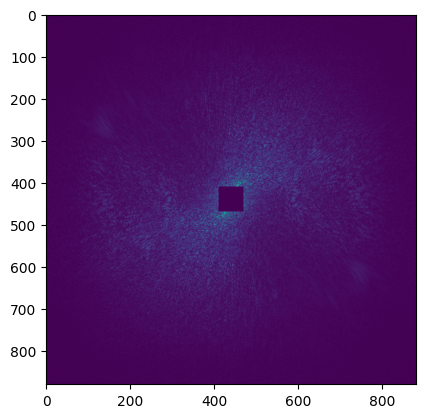

In [109]:
rows, cols = org_img.shape
crow, ccol = int(rows/2), int(cols/2)
fshift[crow - 30:crow + 30, ccol - 30: ccol + 30] = 0

fshift = np.abs(fshift)

plt.imshow(fshift)

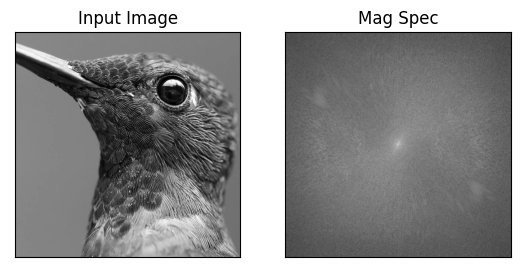

In [110]:
dft = cv2.dft(np.float32(org_img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

mag_spec = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(org_img,cmap='gray')
plt.title("Input Image"),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(mag_spec,cmap='gray')
plt.title("Mag Spec"),plt.xticks([]),plt.yticks([])

plt.show()

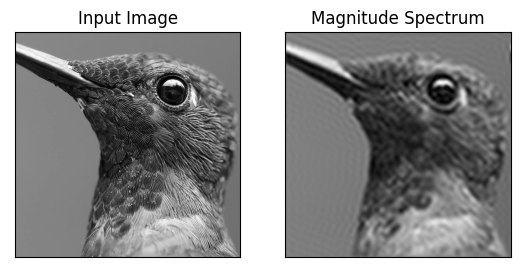

In [111]:
rows, cols = org_img.shape
crow, ccol = int(rows/2), int(cols/2)
mask = np.zeros((rows,cols,2),np.uint8)
mask[crow - 30:crow + 30, ccol - 30: ccol + 30] = 1

fshift = dft_shift*mask
f_shift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_shift)
img_back = cv2.magnitude(img_back[:,:,0],dft_shift[:,:,1])

plt.subplot(121),plt.imshow(org_img,cmap='gray')
plt.title("Input Image"),plt.xticks([]),plt.yticks([])

plt.subplot(122),plt.imshow(img_back,cmap='gray')
plt.title("Magnitude Spectrum"),plt.xticks([]),plt.yticks([])

plt.show()

In [117]:
img_dft=cv2.imread("images/bird.jpg",0)
rows,cols=img_dft.shape
print(rows,cols)

880 880


In [118]:
nrows=cv2.getOptimalDFTSize(rows)
ncols=cv2.getOptimalDFTSize(cols)
print(nrows,ncols)

900 900


In [123]:
nimg=np.zeros((nrows,ncols))
nimg[:rows,:cols]=img_dft

In [119]:
%timeit fft1 = np.fft.fft2(img_dft)

24.3 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [120]:
%timeit fft2 = np.fft.fft2(img_dft,[nrows,ncols])

26.9 ms ± 255 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [121]:
%timeit dft1 = cv2.dft(np.float32(img_dft),flags = cv2.DFT_COMPLEX_OUTPUT)

6 ms ± 57.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [124]:
%timeit dft2 = cv2.dft(np.float32(nimg),flags = cv2.DFT_COMPLEX_OUTPUT)

7.13 ms ± 64.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


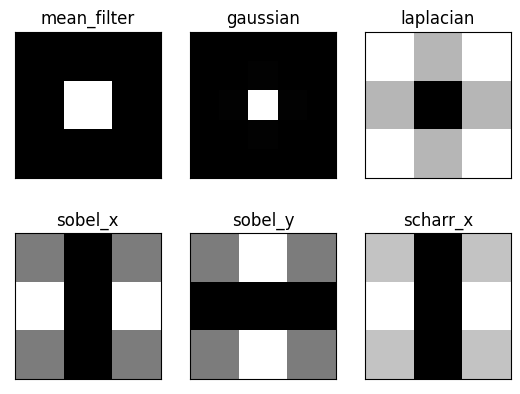

In [125]:
mean_filter = np.ones((3,3))

x = cv2.getGaussianKernel(5,10)
gaussian = x*x.T

scharr = np.array([[-3, 0, 3],
                   [-10,0,10],
                   [-3, 0, 3]])

sobel_x= np.array([[-1, 0, 1],
                  [-2, 0, 2],
                  [-1, 0, 1]])


sobel_y= np.array([[-1,-2,-1],
                    [0, 0, 0],
                    [1, 2, 1]])

laplacian=np.array([[0, 1, 0],
                    [1,-4, 1],
                    [0, 1, 0]])


filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian','laplacian', 'sobel_x','sobel_y', 'scharr_x']

fft_filters = [np.fft.fft2(x) for x in filters]
fft_shift = [np.fft.fftshift(y) for y in fft_filters]
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
  plt.subplot(2,3,i+1),plt.imshow(mag_spectrum[i],cmap = 'gray')
  plt.title(filter_name[i]), plt.xticks([]), plt.yticks([])
plt.show()